C:\Users\feyza\AppData\Local\Temp\ipykernel_9832\2023056266.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hour"] = df["start_date_time"].dt.floor("H")


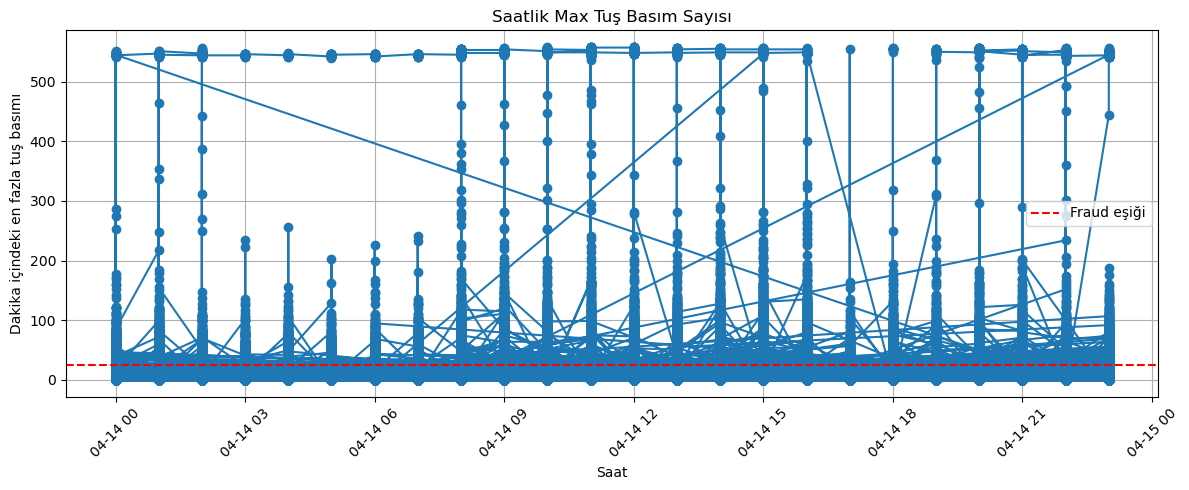

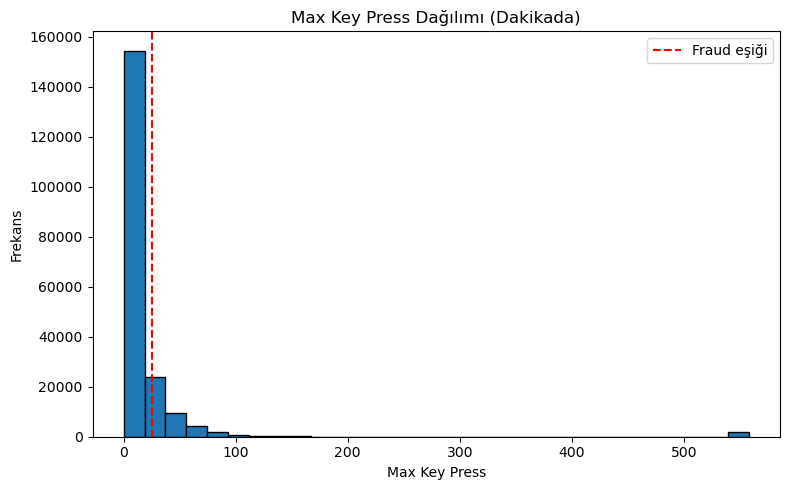

Şüpheli davranışlar (max_key_count > 25):
       start_date_time  max_key_count  \
56 2025-04-14 09:07:05             40   
60 2025-04-14 09:11:07             40   
62 2025-04-14 09:13:08             48   
63 2025-04-14 09:14:09             34   
69 2025-04-14 09:20:12             84   

                                            key_codes  
56                                 {2,40,2,7,6,10,40}  
60                                  {11,40,8,5,14,40}  
62                                    {5,48,8,6,7,48}  
63                                   {7,34,6,4,12,34}  
69  {1,10,8,84,10,6,4,1,7,5,3,2,1,4,2,1,3,2,2,3,9,...  


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını yükle
df = pd.read_csv("C:/store/git/km-stat-activity/data/real/real_activity_log.csv")

# Saat sütunu oluştur
df["start_date_time"] = pd.to_datetime(df["start_date_time"], errors="coerce")
df = df[df["start_date_time"].notna()]
df["hour"] = df["start_date_time"].dt.floor("H")

# key_codes sütununu işle ve max tuş sayısını çıkar
def parse_key_counts(s):
    try:
        numbers = list(map(int, s.strip("{}").split(",")))
        return max(numbers) if numbers else 0
    except:
        return 0

df["max_key_count"] = df["key_codes"].apply(parse_key_counts)

# Fraud flag: çok fazla aynı tuşa basım (>25)
df["fraud_flag_key_count"] = df["max_key_count"] > 25

# Grafik 1: Line chart - zaman içinde max tuş sayısı
plt.figure(figsize=(12, 5))
plt.plot(df["hour"], df["max_key_count"], marker='o')
plt.axhline(25, color='red', linestyle='--', label="Fraud eşiği")
plt.title("Saatlik Max Tuş Basım Sayısı")
plt.xlabel("Saat")
plt.ylabel("Dakika içindeki en fazla tuş basımı")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Grafik 2: Histogram - max tuş basımı dağılımı
plt.figure(figsize=(8, 5))
plt.hist(df["max_key_count"], bins=30, edgecolor='black')
plt.axvline(25, color='red', linestyle='--', label="Fraud eşiği")
plt.title("Max Key Press Dağılımı (Dakikada)")
plt.xlabel("Max Key Press")
plt.ylabel("Frekans")
plt.legend()
plt.tight_layout()
plt.show()

# Potansiyel fraud satırlarını göster
fraud_rows = df[df["fraud_flag_key_count"]]
print("Şüpheli davranışlar (max_key_count > 25):")
print(fraud_rows[["start_date_time", "max_key_count", "key_codes"]].head())
